In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/DDoS-17/DDoS.csv', low_memory=False)

In [4]:
dataset.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.000000,225745.00000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,38257.568402,8879.61946,7.600288,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,23057.302075,19754.64740,3.881586,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.000000,0.00000,0.000000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,18990.000000,80.00000,6.000000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,49799.000000,80.00000,6.000000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,58296.000000,80.00000,6.000000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65534.000000,65532.00000,17.000000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [5]:
column_names = dataset.columns

print(column_names)

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [6]:
unique_labels = dataset[' Label'].unique()

for label in unique_labels:
    print(label)

BENIGN
DDoS


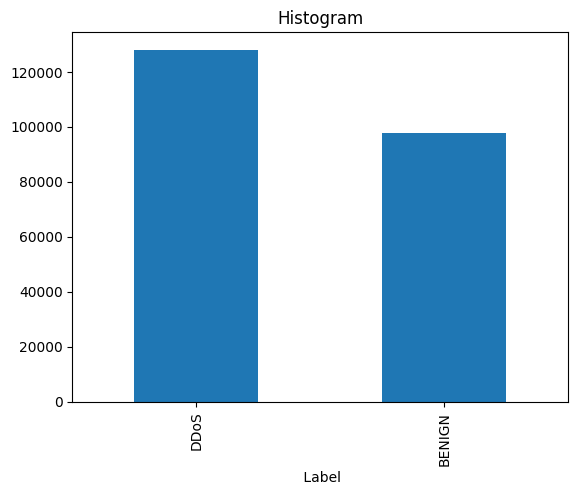

In [7]:
fig_label = dataset[' Label'].value_counts()

fig_label.plot(kind='bar', title='Histogram')
plt.show()

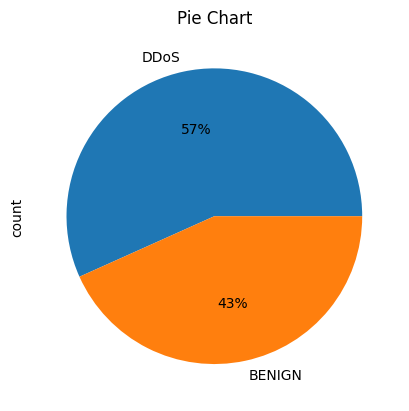

In [8]:
fig_label.plot(kind='pie', autopct='%1.0f%%', title='Pie Chart')
plt.show()

In [9]:
dataset.isnull().sum()

,0
Flow ID,0
Source IP,0
Source Port,0
Destination IP,0
Destination Port,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [51]:
dataset[' Label'].value_counts()

,count
Label,
DDoS,128027
BENIGN,97718


In [10]:
X = dataset.drop(columns=[' Label'])
y = dataset[' Label']

In [11]:
X = X.replace([np.inf, -np.inf], np.nan)

In [12]:
encoder = LabelEncoder()

for column in X.select_dtypes(include=['object']).columns:
  X[column] = encoder.fit_transform(X[column])
y = encoder.fit_transform(y)

In [13]:
X.fillna(X.mean(), inplace=True)

In [14]:
X.shape

(225745, 84)

In [23]:
ipca = IncrementalPCA(n_components=30)
X_transformed = ipca.fit_transform(X)

In [24]:
X_transformed.shape

(225745, 30)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [20]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        assert len(self.X) == len(self.y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = self.X[idx]
        y = self.y[idx]
        return x, y

In [21]:
class DNNBiLSTM(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(DNNBiLSTM, self).__init__()
    self.dnn = nn.Sequential(
        nn.Linear(input_dim, 128),
        nn.ReLU(),
        nn.Linear(128, hidden_dim)
        )
    self.bilstm = nn.LSTM(hidden_dim, hidden_dim, batch_first=True, bidirectional=True)
    self.fc = nn.Linear(hidden_dim * 2, output_dim)

  def forward(self, x):
    x = self.dnn(x)
    x = x.unsqueeze(1)
    lstm_out, _ = self.bilstm(x)
    lstm_out = lstm_out[:, -1, :]
    output = self.fc(lstm_out)
    return output

In [28]:
train_dataset = MyDataset(X_train, y_train)
val_dataset = MyDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataset = MyDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [40]:
input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = 2
epochs = 20

In [41]:
model = DNNBiLSTM(input_dim, hidden_dim, output_dim)

In [42]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [43]:
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        x, y = batch
        x = x.to(device).float()
        y = y.to(device).long()
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}')

    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for batch in val_loader:
            x, y = batch
            x = x.to(device).float()
            y = y.to(device).long()
            outputs = model(x)
            loss = criterion(outputs, y)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y).sum().item()
    accuracy = correct / len(val_dataset)
    print(f'Validation Loss: {val_loss / len(val_loader)}, Accuracy: {accuracy:.4f}')

Epoch 1, Loss: 0.012454867058902284
Validation Loss: 0.0018241378448854478, Accuracy: 0.9995
Epoch 2, Loss: 0.003017147804506928
Validation Loss: 0.0025612647069643345, Accuracy: 0.9993
Epoch 3, Loss: 0.0021487963834332393
Validation Loss: 0.0030808656986916717, Accuracy: 0.9993
Epoch 4, Loss: 0.002174281205033954
Validation Loss: 0.001805757563130766, Accuracy: 0.9993
Epoch 5, Loss: 0.0018629170732330884
Validation Loss: 0.0009299480966385866, Accuracy: 0.9998
Epoch 6, Loss: 0.0014810153933486655
Validation Loss: 0.00115042020043392, Accuracy: 0.9996
Epoch 7, Loss: 0.0014616225652165304
Validation Loss: 0.001339167603528056, Accuracy: 0.9998
Epoch 8, Loss: 0.001238628423349937
Validation Loss: 0.00237040714040973, Accuracy: 0.9993
Epoch 9, Loss: 0.0011350470637437383
Validation Loss: 0.0020936645502590877, Accuracy: 0.9994
Epoch 10, Loss: 0.0012586087829179755
Validation Loss: 0.0017430798408357374, Accuracy: 0.9997
Epoch 11, Loss: 0.0011340188592577824
Validation Loss: 0.001391083690

In [44]:
def evaluate_model(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    predictions = []
    labels = []

    with torch.no_grad():
        for batch in test_loader:
            x, y = batch
            x = x.to(device).float()
            y = y.to(device).long()
            outputs = model(x)
            loss = nn.CrossEntropyLoss()(outputs, y)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y).sum().item()
            predictions.extend(predicted.cpu().numpy())
            labels.extend(y.cpu().numpy())

    accuracy = correct / len(test_loader.dataset)

    precision = precision_score(labels, predictions, zero_division=False)
    recall = recall_score(labels, predictions, zero_division=False)
    f1 = f1_score(labels, predictions, zero_division=False)

    print(f'Test Loss: {test_loss / len(test_loader)}')
    print(f'Test Accuracy: {accuracy:.4f}')

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    print('Classification Report:')
    print(classification_report(labels, predictions))

    confusions = confusion_matrix(labels, predictions)
    print('Confusion Matrix:')
    print(confusions)

    display = ConfusionMatrixDisplay(confusion_matrix=confusions, display_labels=['Benign', 'DDoS'])
    display.plot(cmap='Blues')
    plt.show()

Test Loss: 0.0010436046380542408
Test Accuracy: 0.9996
Precision: 0.9997
Recall: 0.9997
F1 Score: 0.9997
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19405
           1       1.00      1.00      1.00     25744

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149

Confusion Matrix:
[[19397     8]
 [    8 25736]]


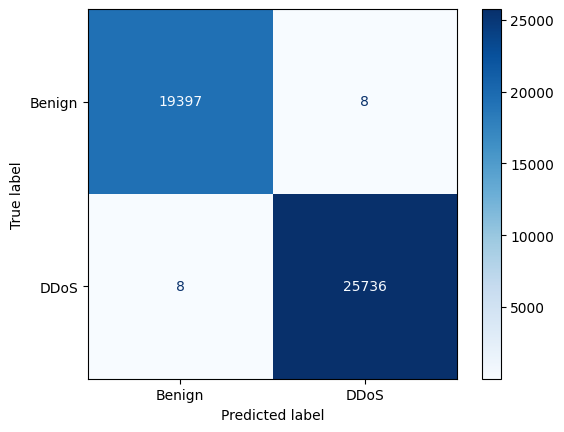

In [45]:
evaluate_model(model, test_loader)

In [46]:
import torch.quantization
quantized_model = torch.quantization.quantize_dynamic(
    model,
    {nn.LSTM},
    dtype=torch.qint8
)

Test Loss: 0.0014043359639940264
Test Accuracy: 0.9996
Precision: 0.9996
Recall: 0.9997
F1 Score: 0.9996
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19405
           1       1.00      1.00      1.00     25744

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149

Confusion Matrix:
[[19394    11]
 [    8 25736]]


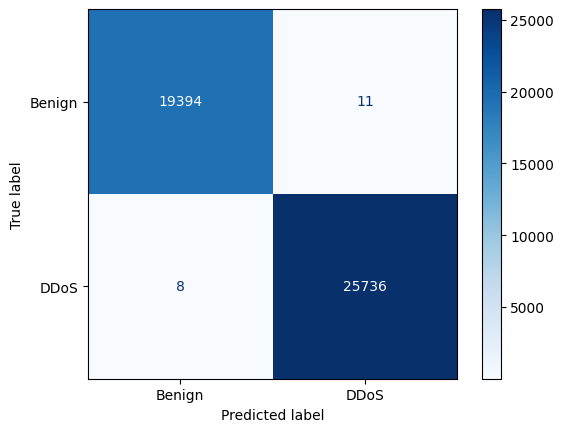

In [47]:
evaluate_model(quantized_model, test_loader)

In [48]:
torch.save(quantized_model.state_dict(), '/content/drive/MyDrive/DDoS-17/quantized_model.pth')

model_size = os.path.getsize('/content/drive/MyDrive/DDoS-17/quantized_model.pth') /1024
print(f'Model size: {model_size} KB')

Model size: 122.30859375 KB


In [49]:
torch.save(model.state_dict(), '/content/drive/MyDrive/DDoS-17/model.pth')

model_size2 = os.path.getsize('/content/drive/MyDrive/DDoS-17/model.pth') /1024
print(f'Model size: {model_size2} KB')

Model size: 312.6328125 KB
